In [2]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [3]:
# Read data
df = pd.read_csv('products.csv')

In [4]:
df.shape

(200, 6)

In [5]:
df.head()

,F1,F2,F3,F4,F5,Price
0,0.548814,0.715189,0.602763,0.544883,0.423655,17.213492
1,0.645894,0.437587,0.891773,0.963663,0.383442,22.381191
2,0.791725,0.528895,0.568045,0.925597,0.071036,19.379654
3,0.087129,0.020218,0.832620,0.778157,0.870012,14.399690
4,0.978618,0.799159,0.461479,0.780529,0.118274,14.750309


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      200 non-null    float64
 1   F2      200 non-null    float64
 2   F3      200 non-null    float64
 3   F4      200 non-null    float64
 4   F5      200 non-null    float64
 5   Price   200 non-null    float64
dtypes: float64(6)
memory usage: 9.5 KB


In [7]:
df.describe()

,F1,F2,F3,F4,F5,Price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.488885,0.486995,0.458479,0.508712,0.536536,14.414113
std,0.291367,0.276191,0.291254,0.293803,0.297782,4.995795
min,0.002703,0.000546,0.001383,0.013237,0.004695,1.796467
25%,0.244380,0.263635,0.216220,0.253217,0.284504,10.734376
50%,0.450644,0.456334,0.441150,0.521305,0.525546,14.287728
75%,0.736081,0.706210,0.674524,0.752287,0.813818,17.594242
max,0.997962,0.992011,0.988374,0.994401,0.999809,26.724145


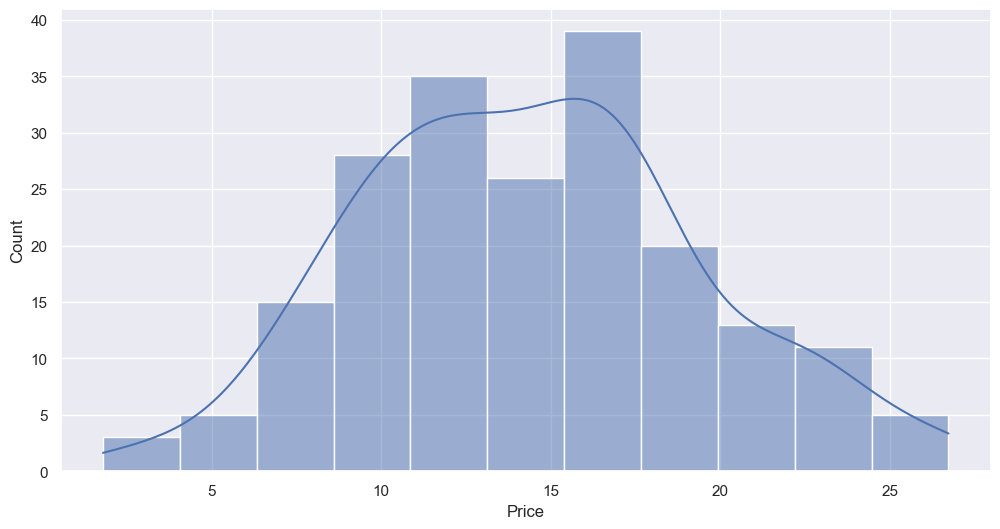

In [14]:
# Plot the target
plt.figure(figsize=(12,6))
sns.histplot(df.Price, kde=True);

In [15]:
corr = df.corr()

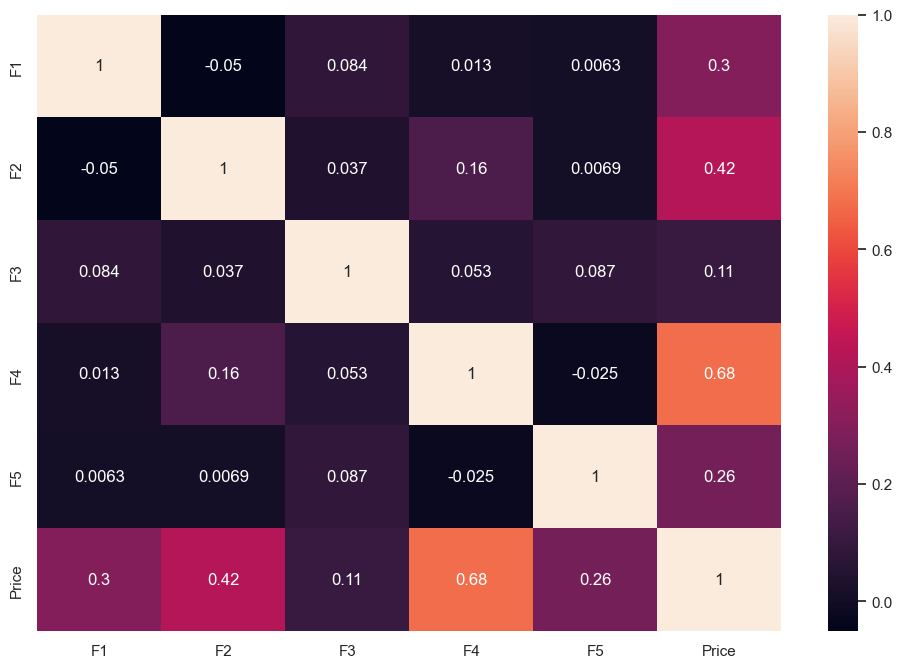

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True);

In [18]:
# import ML
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop(['Price'], axis=1)

In [20]:
X.head()

,F1,F2,F3,F4,F5
0,0.548814,0.715189,0.602763,0.544883,0.423655
1,0.645894,0.437587,0.891773,0.963663,0.383442
2,0.791725,0.528895,0.568045,0.925597,0.071036
3,0.087129,0.020218,0.832620,0.778157,0.870012
4,0.978618,0.799159,0.461479,0.780529,0.118274


In [21]:
y = df.Price

In [22]:
y

0      17.213492
1      22.381191
2      19.379654
3      14.399690
4      14.750309
         ...    
195    10.131478
196    18.447839
197    17.986174
198    10.339007
199    11.089793
Name: Price, Length: 200, dtype: float64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
# Model
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [28]:
predictions = model.predict(X_test)

In [29]:
predictions_df = pd.DataFrame(predictions, columns=['Predict Price'])

In [30]:
predictions_df.head()

,Predict Price
0,21.383960
1,6.312029
2,13.956207
3,11.649416
4,17.380874


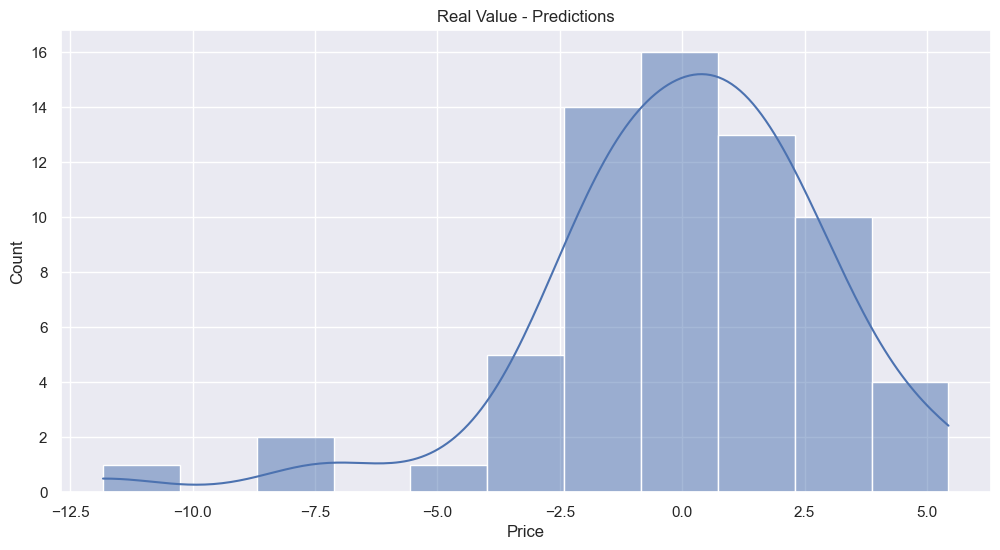

In [34]:
plt.figure(figsize=(12,6))
sns.histplot((y_test-predictions), kde=True)
plt.title("Real Value - Predictions");

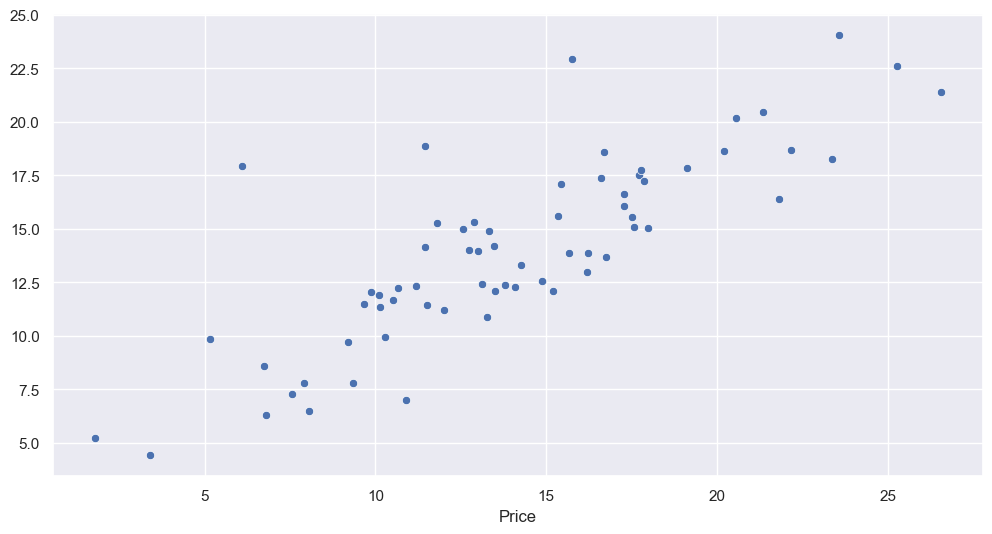

In [37]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=y_test, y=predictions);

### Metrics Linear Regression

In [38]:
# imports
from sklearn import metrics
import numpy as np

#### Mean Absolute Error

In [45]:
print('The Mean Absolute Error is: {}'.format(metrics.mean_absolute_error(y_test, predictions)))

The Mean Absolute Error is: 2.112255425550431


#### Mean Squarred Error

In [46]:
print('The Mean Squared Error is: {}'.format(metrics.mean_squared_error(y_test, predictions)))

The Mean Squared Error is: 8.403284562193218


#### Root Mean Absolute Error

In [47]:
print('The Root Mean Absolute Error is: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

The Root Mean Absolute Error is: 2.8988419346686043


### Intercept and Coefficients

In [48]:
# intercept
model.intercept_

0.8026424440195559

In [49]:
# coeficients
coefficient = model.coef_

In [50]:
coefficient

array([ 6.20672915,  6.58283995, -0.68333038,  9.73572121,  5.08290023])

In [51]:
coef_df = pd.DataFrame([coefficient], columns=X.columns)

In [52]:
coef_df

,F1,F2,F3,F4,F5
0,6.206729,6.58284,-0.68333,9.735721,5.0829


### Equation
- f(x) = 0.80 + 6.2067.F1 + 6.5828.F2 + -0.6833.F3 + 9.7357.F4 + 5.0829.F5

### Conclusion

- When all factors are constant
- One unit increase in **F1**
- Leads to 6.2 incrise in the **price**